<a href="https://colab.research.google.com/github/koto253/MATH_611/blob/main/Module03_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework Week 3

1. Load the Given data set fruit.csv, which contains the samples of fruit's mass, height, and name.

    https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv

    columns
    - fruit name: mandarin, apple, lemon
    - mass
    - height


2. Define the features as mass and height, and the target as the variable "isLemon", which is derived by yourself (if fruit is lemon then 1 else -1). Print the feature matrix and target vector, respectively.
3. Draw a scatter plot of the binary classification (isLemon) by two features (mass, height). 
4. Add x0 vector to the feature matrix X. Apply the perceptron algorithm to predict the classification (isLemon). What is the smallest number of misclassified samples you can get? (hint: try a very large number of epoch because the optimization of our current perceptron method is not efficient)


In [ ]:
import pandas as pd                
# because this data set has no head (column names), we set head=None

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv', header=None) 
# df[:50]

In [13]:
df[0].value_counts()

apple         19
lemon         16
mandarin       5
fruit_name     1
Name: 0, dtype: int64

In [14]:
# import numpy
import numpy as np

# np.where?

In [15]:
from ast import increment_lineno
# Define the features as mass and height, and the target as the variable "isLemon", 
# which is derived by yourself (if fruit is lemon then 1 else -1). 


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

# define target vector "isLemon"
isLemon = df.iloc[0:40, 0].values ## select the label column in first 40 instances, which have apple, lemon and mandarin

isLemon = np.where(isLemon == 'lemon', -1, 1) ## define the target (lemon as -1, apple and mandarin as 1)

# Print the feature matrix and target vector, respectively.
isLemon


array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

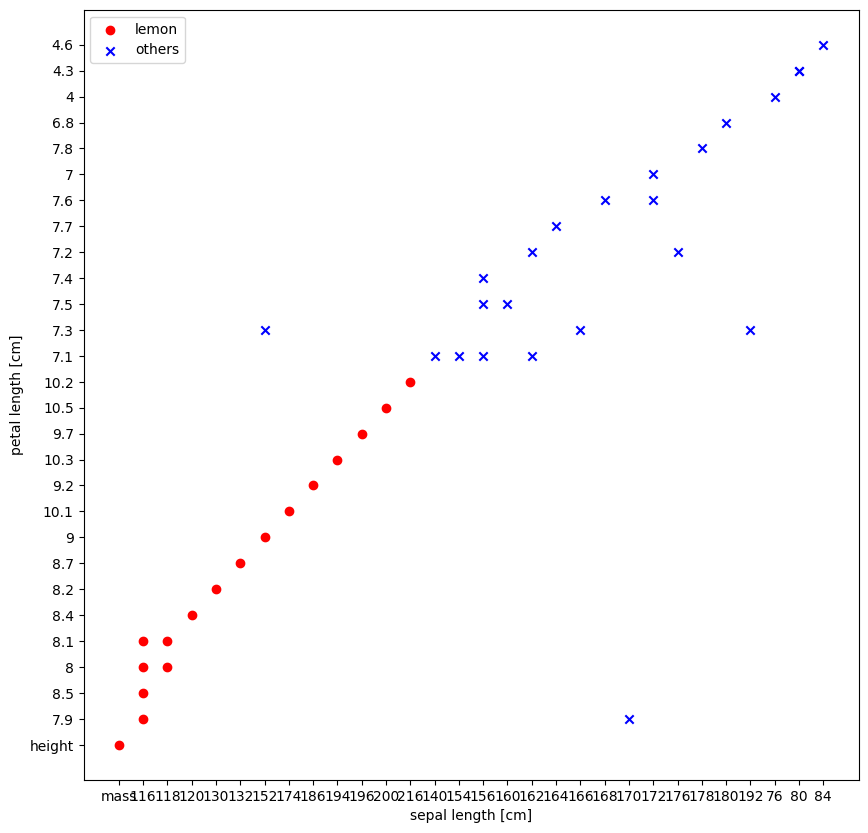

In [18]:
## 3. Draw a scatter plot of the binary classification (isLemon) by two features (mass, height).

twoFeatures = df.iloc[0:40, [1, 2]].values ## extract the columns of Mass length and Heigh length


# Make the plot a little larger
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

# plot data
plt.scatter(twoFeatures[: 17, 0], twoFeatures[: 17, 1],
            color='red', marker='o', label='lemon')

plt.scatter(twoFeatures[17: 40, 0], twoFeatures[17: 40, 1],
            color='blue', marker='x', label='others')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()
